In [1]:
from eda import EDAProcessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proc = EDAProcessor("loan_data.csv")
df = proc.load_and_process()
print(df.columns.tolist())

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']


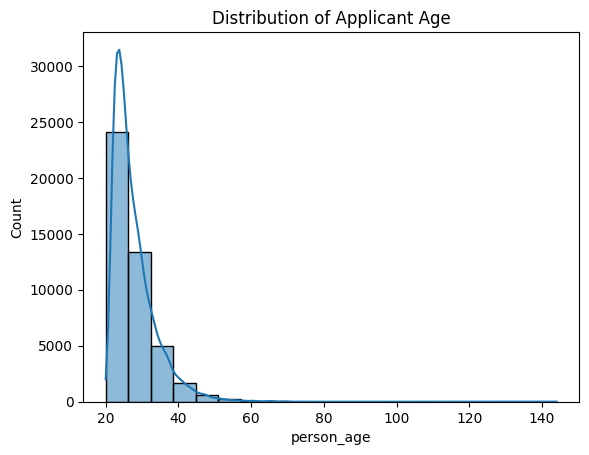

In [3]:
sns.histplot(df['person_age'], bins=20, kde=True)
plt.title("Distribution of Applicant Age")
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_43975/2352409084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="person_gender", data=df, palette="Set2")


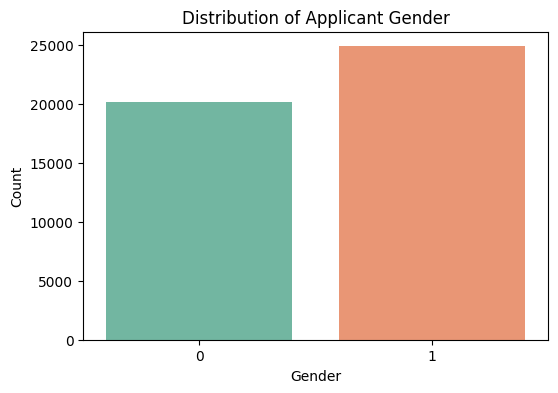

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="person_gender", data=df, palette="Set2")

plt.title("Distribution of Applicant Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

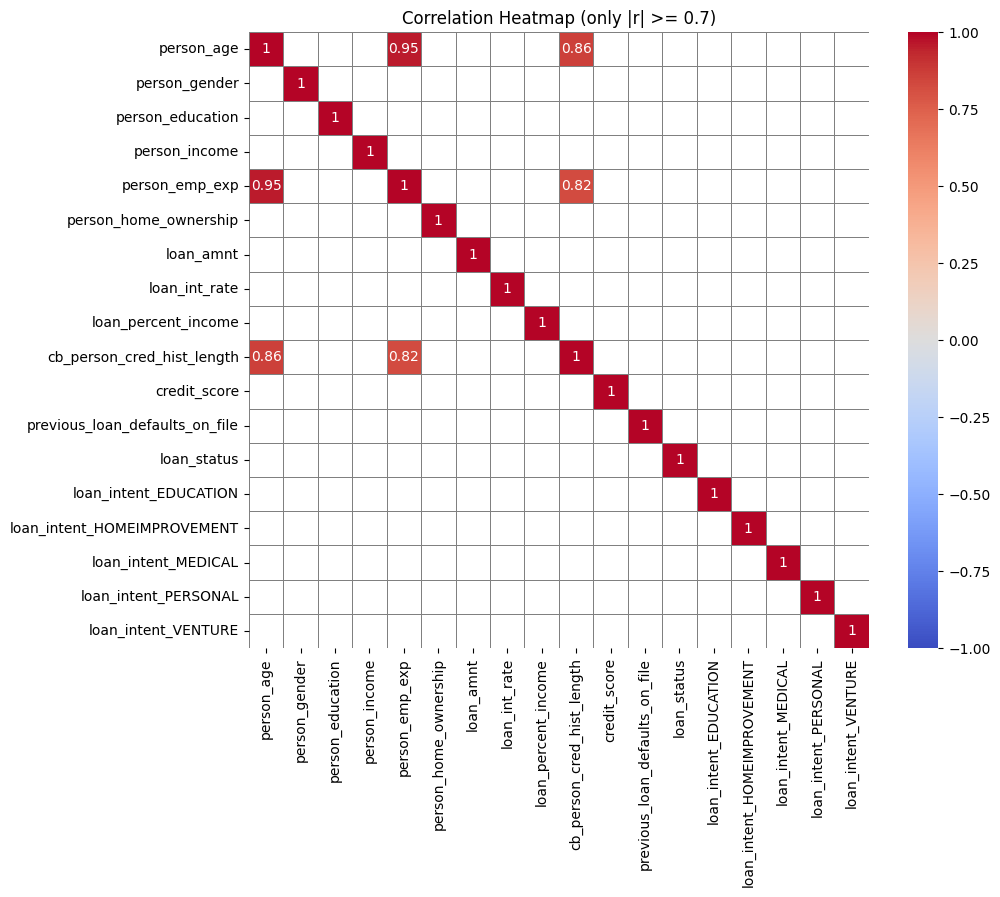

In [5]:
corr = df.corr()
THRESH = 0.7
tri_mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
strong = corr.where(tri_mask).stack().loc[lambda s: s.abs() >= THRESH].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr.where(corr.abs() >= THRESH), annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, linecolor="gray")
plt.title(f"Correlation Heatmap (only |r| >= {THRESH})")
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_43975/364323202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette=colors, ax=axes[0])


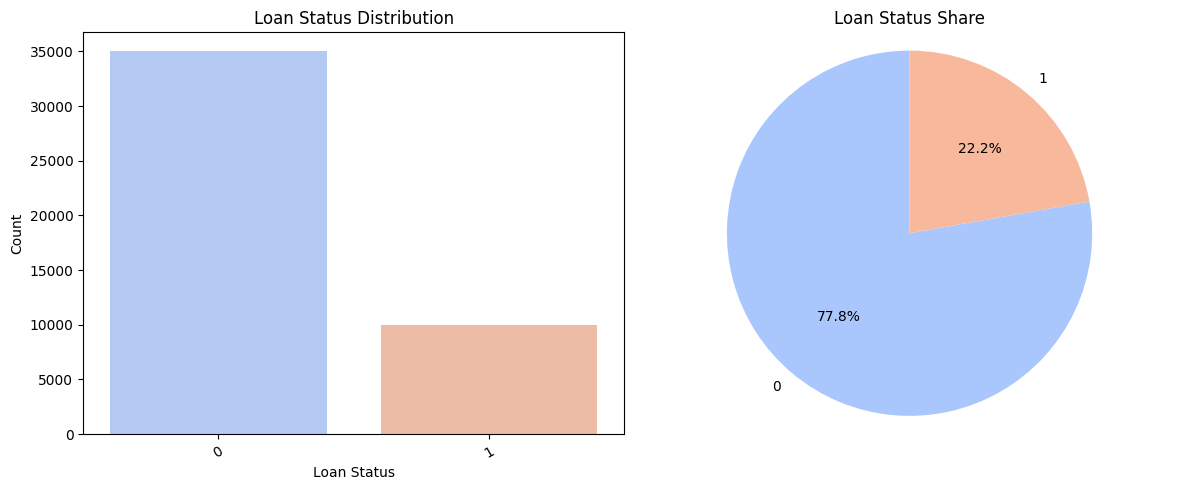

In [10]:
counts = df['loan_status'].value_counts(dropna=False)
colors = sns.color_palette("coolwarm", n_colors=len(counts))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# left: countplot (bar)
sns.countplot(x='loan_status', data=df, palette=colors, ax=axes[0])
axes[0].set_title('Loan Status Distribution')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')
for label in axes[0].get_xticklabels():
    label.set_rotation(30)

# right: pie chart
axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Loan Status Share')
axes[1].axis('equal')  # keep pie circular

plt.tight_layout()
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_43975/2925449442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='credit_score', data=df, palette='Set2')


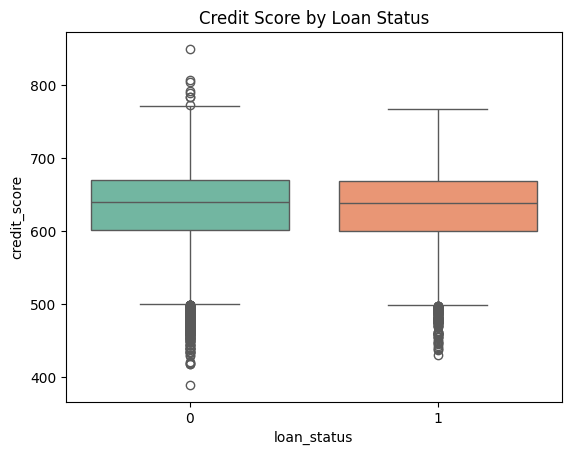

In [7]:
sns.boxplot(x='loan_status', y='credit_score', data=df, palette='Set2')
plt.title('Credit Score by Loan Status')
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_43975/2245146136.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emp_exp_bucket', y='person_income', data=df, palette='Set2', ax=axes[0,1])


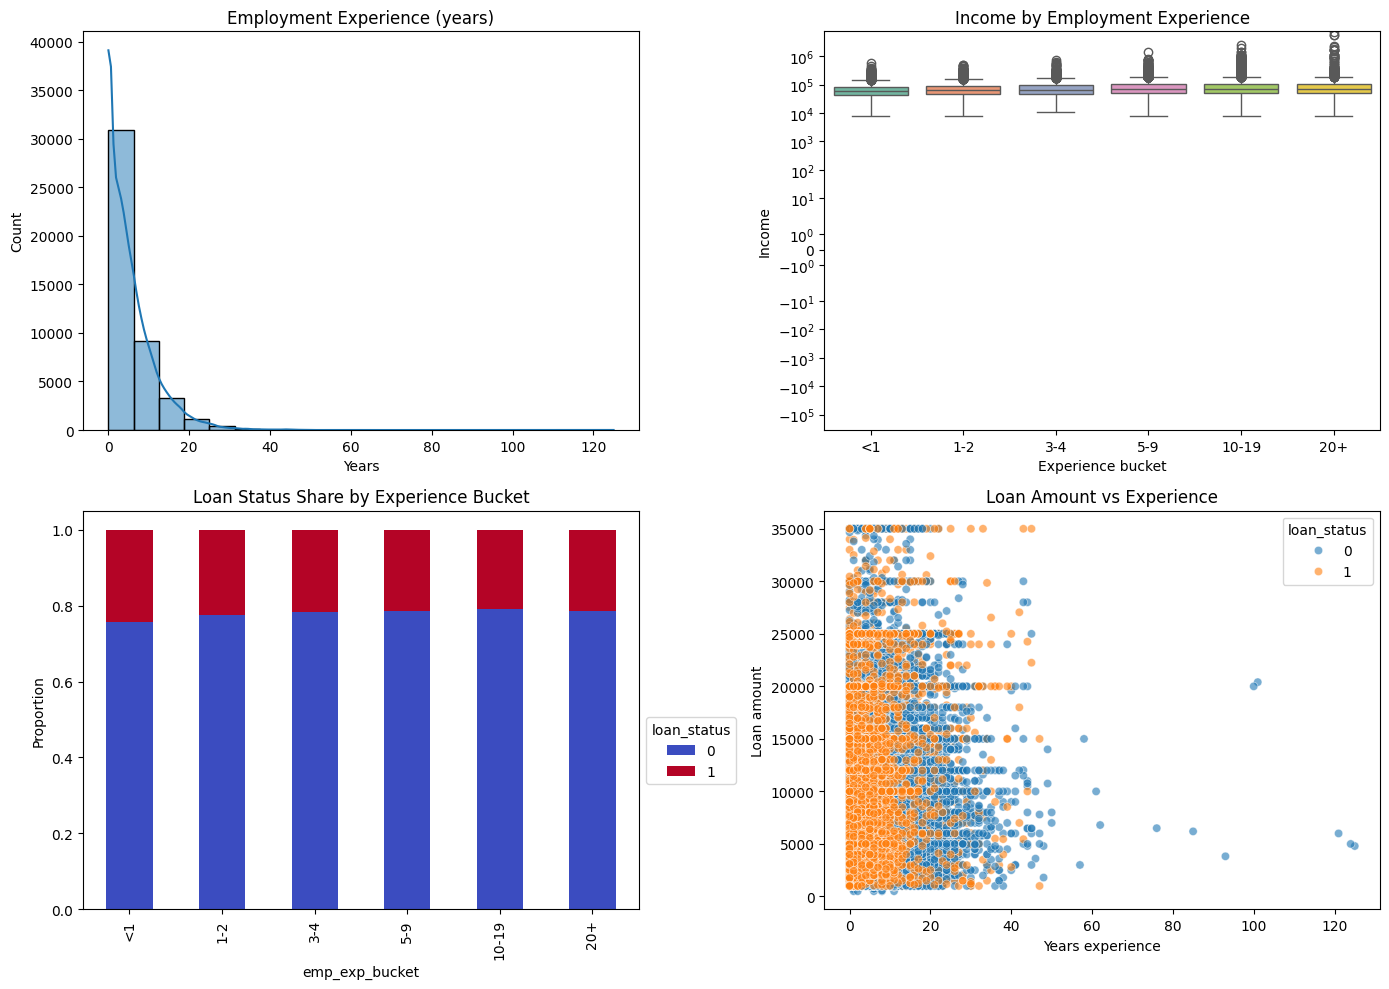

In [11]:
# ...existing code...
# Employment-details visualization cell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# create numeric experience and buckets (robust to different column names)
df['emp_exp_years'] = pd.to_numeric(df.get('person_emp_exp', df.get('emp_exp', pd.Series(np.nan))), errors='coerce')
df['emp_exp_bucket'] = pd.cut(
    df['emp_exp_years'],
    bins=[-0.1, 0.99, 2.99, 4.99, 9.99, 19.99, 1e9],
    labels=['<1','1-2','3-4','5-9','10-19','20+']
)

# 2x2 summary plots: experience distribution, income by bucket, loan status share, loan amount vs experience
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1) Experience distribution
sns.histplot(df['emp_exp_years'].dropna(), bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title('Employment Experience (years)')
axes[0,0].set_xlabel('Years')

# 2) Income by experience bucket (boxplot)
sns.boxplot(x='emp_exp_bucket', y='person_income', data=df, palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Income by Employment Experience')
axes[0,1].set_xlabel('Experience bucket')
axes[0,1].set_ylabel('Income')
# use symlog to handle zeros and large values; switch to 'log' if safe
axes[0,1].set_yscale('symlog')

# 3) Loan status share within each experience bucket (stacked proportion bar)
ct = pd.crosstab(df['emp_exp_bucket'], df['loan_status'])
if not ct.empty:
    ct_norm = ct.div(ct.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
    ct_norm.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='coolwarm')
    axes[1,0].set_title('Loan Status Share by Experience Bucket')
    axes[1,0].set_ylabel('Proportion')
    axes[1,0].legend(title='loan_status', bbox_to_anchor=(1, 0.5))

# 4) Loan amount vs experience (scatter)
sns.scatterplot(x='emp_exp_years', y='loan_amnt', hue='loan_status', data=df, alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Loan Amount vs Experience')
axes[1,1].set_xlabel('Years experience')
axes[1,1].set_ylabel('Loan amount')

plt.tight_layout()
plt.show()

# Additional: income distribution for top job titles (if job-title column exists)
job_col = next((c for c in df.columns if 'job' in c.lower() and 'title' in c.lower()), None)
if job_col:
    TOP_N = 12
    top_jobs = df[job_col].value_counts().head(TOP_N).index
    plt.figure(figsize=(12, 6))
    sns.boxenplot(x=job_col, y='person_income', data=df[df[job_col].isin(top_jobs)], order=top_jobs, palette='vlag')
    plt.title(f'Income by Top {TOP_N} Job Titles')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('symlog')
    plt.tight_layout()
    plt.show()
# ...existing code...

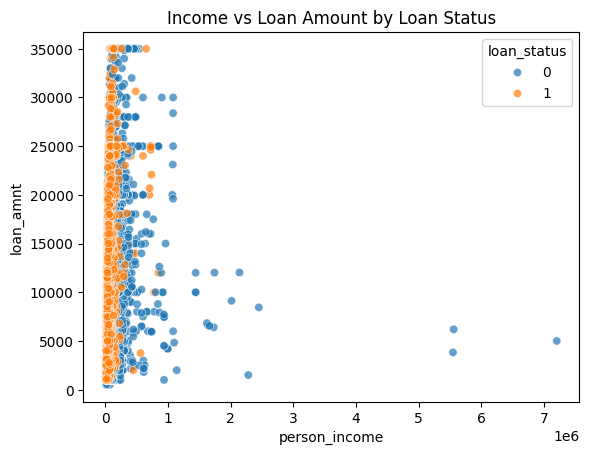

In [8]:
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df, alpha=0.7)
plt.title('Income vs Loan Amount by Loan Status')
plt.show()

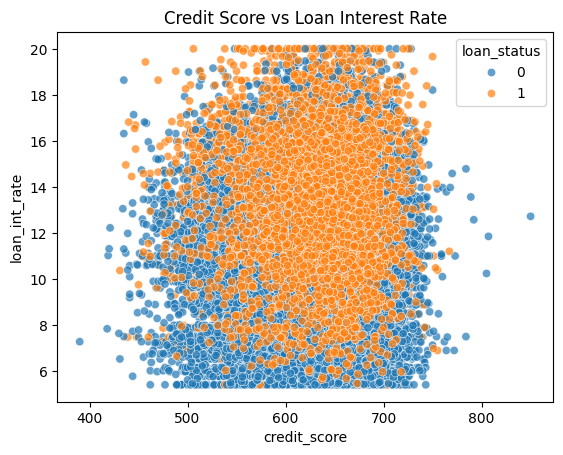

In [9]:
sns.scatterplot(x='credit_score', y='loan_int_rate', hue='loan_status', data=df, alpha=0.7)
plt.title('Credit Score vs Loan Interest Rate')
plt.show()